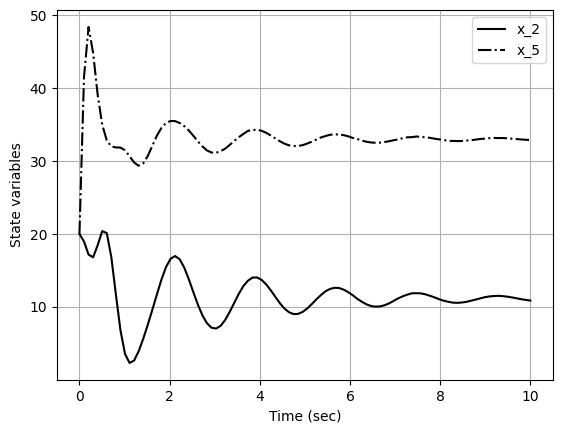

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the train model function
def train_model1(t, x):
    A = np.array([
        [0,    0,   0,   0,   0,    1,      0,      0,   0,   0],
        [0,    0,   0,   0,   0,    1,     -1,      0,   0,   0],
        [0,    0,   0,   0,   0,    0,      1,     -1,   0,   0],
        [0,    0,   0,   0,   0,    0,      0,      1,  -1,   0],
        [0,    0,   0,   0,   0,    0,      0,      0,   1,  -1],
        [0, -12.5,  0,   0,   0,  -0.75,   0.75,    0,   0,   0],
        [0,  62.5, -62.5, 0,  0,   3.75,  -7.5,   3.75,  0,   0],
        [0,  0, 62.5, -62.5,  0,    0,  3.75,  -7.5,  3.75,  0],
        [0,  0,  0, 62.5, -62.5,    0,     0,  3.75,  -7.5,  3.75],
        [0,    0,   0,   0,  62.5,  0,     0,    0,  3.75, -3.75]
    ])

    b1 = np.array([0, 0, 0, 0, 0.005, 0, 0, 0, 0, 0])  # Force input
    b2 = np.array([0, 0, 0, 0, 250, 0, 0, 0, 0, -1250])  # Constant input

    u = 750  # Constant input

    xp = A.dot(x) + b1 * u + b2
    return xp

# Define initial conditions and time span for the ODE solver
tspan = (0, 10)  # Define the time range for the simulation
x0 = np.array([0, 20, 20, 20, 20, 0, 0, 0, 0, 0])  # Initial state

# Solve the differential equation
sol = solve_ivp(train_model1, tspan, x0, method='RK45', t_eval=np.linspace(tspan[0], tspan[1], 100))

# Extract time points and state variables
t = sol.t
x = sol.y.T  # Transpose for easier indexing

# Plot the results
plt.plot(t, x[:, 1], 'k', label='x_2')  # x_2 is the second state variable
plt.plot(t, x[:, 4], 'k-.', label='x_5')  # x_5 is the fifth state variable
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()
